In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats

In [2]:
data = {
    'scVGAE': [0.7278, 0.5605, 0.7978, 0.5937, 0.1840, 0.4792, 0.0940, 0.7914, 0.6108, 0.2811, 0.3095, 0.2373, 0.6933, 0.7357],
    'Original': [0.5606, 0.5083, 0.6598, 0.4358, 0.1747, 0.3565, 0.0371, 0.7119, 0.5043, 0.3421, 0.2929, 0.2303, 0.6381, 0.6749],
    'MAGIC': [0.7657, 0.4685, 0.7437, 0.6622, 0.1620, 0.4439, 0.0347, 0.7771, 0.4117, 0.2871, 0.2123, 0.1778, 0.6501, 0.6995],
    'ALRA': [0.4235, 0.4967, 0.6510, 0.4699, 0.1351, 0.3462, 0.0895, 0.6021, 0.4419, 0.3435, 0.2858, 0.2020, 0.6370, 0.6629],
    'DeepImpute': [0.8623, 0.1991, 0.3750, 0.3348, 0.1217, 0.1403, 0.0246, 0.4492, 0.3589, 0.1379, 0.1269, 0.1629, 0.2911, 0.3445],
    'DCA': [0.6392, 0.3775, 0.4799, 0.4432, 0.1502, 0.1978, 0.0352, 0.6681, 0.4634, 0.2612, 0.1726, 0.1855, 0.5122, 0.4711],
    'GNNImpute': [0.5165, 0.3746, 0.7023, 0.5632, 0.0956, 0.3041, 0.0370, 0.6282, 0.4562, 0.2284, 0.1883, 0.1735, 0.5583, 0.6531]
}

df = pd.DataFrame(data, index=[
    'baron', 'brosens', 'carey', 'cbmc', 'chang', 'Fujii', 'hcabm40k', 
    'hrvatin', 'jakel', 'jiang', 'manno', 'mingyao', 'pbmc3k', 'Xu'
])
df

,scVGAE,Original,MAGIC,ALRA,DeepImpute,DCA,GNNImpute
baron,0.7278,0.5606,0.7657,0.4235,0.8623,0.6392,0.5165
brosens,0.5605,0.5083,0.4685,0.4967,0.1991,0.3775,0.3746
carey,0.7978,0.6598,0.7437,0.6510,0.3750,0.4799,0.7023
cbmc,0.5937,0.4358,0.6622,0.4699,0.3348,0.4432,0.5632
chang,0.1840,0.1747,0.1620,0.1351,0.1217,0.1502,0.0956
Fujii,0.4792,0.3565,0.4439,0.3462,0.1403,0.1978,0.3041
hcabm40k,0.0940,0.0371,0.0347,0.0895,0.0246,0.0352,0.0370
hrvatin,0.7914,0.7119,0.7771,0.6021,0.4492,0.6681,0.6282
jakel,0.6108,0.5043,0.4117,0.4419,0.3589,0.4634,0.4562
jiang,0.2811,0.3421,0.2871,0.3435,0.1379,0.2612,0.2284


In [3]:
for i in df.columns:
    print(i, pd.DataFrame(stats.ttest_rel(df[i], df['scVGAE'])).loc[1][0])

scVGAE nan
Original 0.0015096218441707845
MAGIC 0.026196816852407854
ALRA 0.0021786072846041032
DeepImpute 0.00019959002274853532
DCA 5.8383450971814674e-05
GNNImpute 3.5927740397789773e-06


In [4]:
ari = pd.DataFrame()
for i in df.index:
    tmp = pd.DataFrame(df.loc[i].values, columns=['Value'])
    tmp['Dataset'] = [i]*len(df.columns)
    tmp['Methods'] =df.columns
    
    ari = pd.concat([
        ari, tmp
    ])

In [5]:
data = {
    'scVGAE': [0.7896, 0.6687, 0.8146, 0.6855, 0.3244, 0.5716, 0.1343, 0.8590, 0.6627, 0.4789, 0.4735, 0.3764, 0.7732, 0.7929],
    'Original': [0.7500, 0.6355, 0.7213, 0.6367, 0.3135, 0.4767, 0.0525, 0.8514, 0.6316, 0.5101, 0.4466, 0.3224, 0.7248, 0.7396],
    'MAGIC': [0.8356, 0.6494, 0.7782, 0.7462, 0.3023, 0.5658, 0.0517, 0.8677, 0.5875, 0.4964, 0.4301, 0.2942, 0.7649, 0.7814],
    'ALRA': [0.7143, 0.6296, 0.7088, 0.6437, 0.2558, 0.4749, 0.1311, 0.7979, 0.5986, 0.5360, 0.4574, 0.3105, 0.7389, 0.7414],
    'DeepImpute': [0.7691, 0.3557, 0.5577, 0.5244, 0.2266, 0.2289, 0.0420, 0.6888, 0.4643, 0.2456, 0.2995, 0.2555, 0.4693, 0.4942],
    'DCA': [0.7567, 0.5506, 0.6164, 0.6156, 0.2855, 0.3216, 0.0532, 0.8155, 0.5718, 0.4017, 0.3779, 0.3039, 0.6661, 0.5811],
    'GNNImpute': [0.6641, 0.5434, 0.7266, 0.6258, 0.1941, 0.4276, 0.0498, 0.6856, 0.5742, 0.3974, 0.3680, 0.2646, 0.6615, 0.7011]
}

df = pd.DataFrame(data, index=[
    'baron', 'brosens', 'carey', 'cbmc', 'chang', 'Fujii', 'hcabm40k', 
    'hrvatin', 'jakel', 'jiang', 'manno', 'mingyao', 'pbmc3k', 'Xu'
])
df

,scVGAE,Original,MAGIC,ALRA,DeepImpute,DCA,GNNImpute
baron,0.7896,0.7500,0.8356,0.7143,0.7691,0.7567,0.6641
brosens,0.6687,0.6355,0.6494,0.6296,0.3557,0.5506,0.5434
carey,0.8146,0.7213,0.7782,0.7088,0.5577,0.6164,0.7266
cbmc,0.6855,0.6367,0.7462,0.6437,0.5244,0.6156,0.6258
chang,0.3244,0.3135,0.3023,0.2558,0.2266,0.2855,0.1941
Fujii,0.5716,0.4767,0.5658,0.4749,0.2289,0.3216,0.4276
hcabm40k,0.1343,0.0525,0.0517,0.1311,0.0420,0.0532,0.0498
hrvatin,0.8590,0.8514,0.8677,0.7979,0.6888,0.8155,0.6856
jakel,0.6627,0.6316,0.5875,0.5986,0.4643,0.5718,0.5742
jiang,0.4789,0.5101,0.4964,0.5360,0.2456,0.4017,0.3974


In [6]:
for i in df.columns:
    print(i, pd.DataFrame(stats.ttest_rel(df[i], df['scVGAE'])).loc[1][0])

scVGAE nan
Original 0.0004842675733597322
MAGIC 0.14662439759986504
ALRA 0.0008203811211679664
DeepImpute 3.425426086101444e-06
DCA 5.0249137704498974e-05
GNNImpute 3.941796364568744e-09


In [7]:
ami = pd.DataFrame()
for i in df.index:
    tmp = pd.DataFrame(df.loc[i].values, columns=['Value'])
    tmp['Dataset'] = [i]*len(df.columns)
    tmp['Methods'] =df.columns
    
    ami = pd.concat([
        ami, tmp
    ])

In [8]:
data = {
    'scVGAE': [0.7942, 0.6708, 0.8153, 0.6911, 0.3459, 0.5744, 0.1368, 0.8642, 0.6642, 0.4859, 0.5030, 0.3776, 0.7751, 0.7948],
    'Original': [0.7551, 0.6379, 0.7223, 0.6431, 0.3354, 0.4801, 0.0554, 0.8569, 0.6332, 0.5167, 0.4784, 0.3237, 0.7271, 0.7419],
    'MAGIC': [0.8393, 0.6517, 0.7789, 0.7511, 0.3248, 0.5687, 0.0546, 0.8726, 0.5893, 0.5032, 0.4629, 0.2956, 0.7668, 0.7833],
    'ALRA': [0.7204, 0.6321, 0.7098, 0.6501, 0.2795, 0.4783, 0.1337, 0.8054, 0.6003, 0.5422, 0.4888, 0.3118, 0.7411, 0.7437],
    'DeepImpute': [0.7745, 0.3603, 0.5593, 0.5320, 0.2515, 0.2340, 0.0449, 0.7003, 0.4666, 0.2556, 0.3385, 0.2568, 0.4737, 0.4989],
    'DCA': [0.7621, 0.5535, 0.6177, 0.6227, 0.3086, 0.3260, 0.0565, 0.8224, 0.5740, 0.4095, 0.4137, 0.3052, 0.6688, 0.5848],
    'GNNImpute': [0.6716, 0.5463, 0.7276, 0.6326, 0.2199, 0.4313, 0.0526, 0.6939, 0.5762, 0.4053, 0.4042, 0.2660, 0.6642, 0.7037]
}

df = pd.DataFrame(data, index=[
    'baron', 'brosens', 'carey', 'cbmc', 'chang', 'Fujii', 'hcabm40k', 
    'hrvatin', 'jakel', 'jiang', 'manno', 'mingyao', 'pbmc3k', 'Xu'
])
df

,scVGAE,Original,MAGIC,ALRA,DeepImpute,DCA,GNNImpute
baron,0.7942,0.7551,0.8393,0.7204,0.7745,0.7621,0.6716
brosens,0.6708,0.6379,0.6517,0.6321,0.3603,0.5535,0.5463
carey,0.8153,0.7223,0.7789,0.7098,0.5593,0.6177,0.7276
cbmc,0.6911,0.6431,0.7511,0.6501,0.5320,0.6227,0.6326
chang,0.3459,0.3354,0.3248,0.2795,0.2515,0.3086,0.2199
Fujii,0.5744,0.4801,0.5687,0.4783,0.2340,0.3260,0.4313
hcabm40k,0.1368,0.0554,0.0546,0.1337,0.0449,0.0565,0.0526
hrvatin,0.8642,0.8569,0.8726,0.8054,0.7003,0.8224,0.6939
jakel,0.6642,0.6332,0.5893,0.6003,0.4666,0.5740,0.5762
jiang,0.4859,0.5167,0.5032,0.5422,0.2556,0.4095,0.4053


In [9]:
for i in df.columns:
    print(i, pd.DataFrame(stats.ttest_rel(df[i], df['scVGAE'])).loc[1][0])

scVGAE nan
Original 0.0005197602522221581
MAGIC 0.14769352918005962
ALRA 0.0008715996407636887
DeepImpute 3.87712664741887e-06
DCA 5.707267012622e-05
GNNImpute 3.716097184998796e-09


In [10]:
nmi = pd.DataFrame()
for i in df.index:
    tmp = pd.DataFrame(df.loc[i].values, columns=['Value'])
    tmp['Dataset'] = [i]*len(df.columns)
    tmp['Methods'] =df.columns
    
    nmi = pd.concat([
        nmi, tmp
    ])

In [13]:
ami

,Value,Dataset,Methods
0,0.7896,baron,scVGAE
1,0.7500,baron,Original
2,0.8356,baron,MAGIC
3,0.7143,baron,ALRA
4,0.7691,baron,DeepImpute
...,...,...,...
2,0.7814,Xu,MAGIC
3,0.7414,Xu,ALRA
4,0.4942,Xu,DeepImpute
5,0.5811,Xu,DCA


In [14]:
nmi

,Value,Dataset,Methods
0,0.7942,baron,scVGAE
1,0.7551,baron,Original
2,0.8393,baron,MAGIC
3,0.7204,baron,ALRA
4,0.7745,baron,DeepImpute
...,...,...,...
2,0.7833,Xu,MAGIC
3,0.7437,Xu,ALRA
4,0.4989,Xu,DeepImpute
5,0.5848,Xu,DCA


In [15]:
ari

,Value,Dataset,Methods
0,0.7278,baron,scVGAE
1,0.5606,baron,Original
2,0.7657,baron,MAGIC
3,0.4235,baron,ALRA
4,0.8623,baron,DeepImpute
...,...,...,...
2,0.6995,Xu,MAGIC
3,0.6629,Xu,ALRA
4,0.3445,Xu,DeepImpute
5,0.4711,Xu,DCA


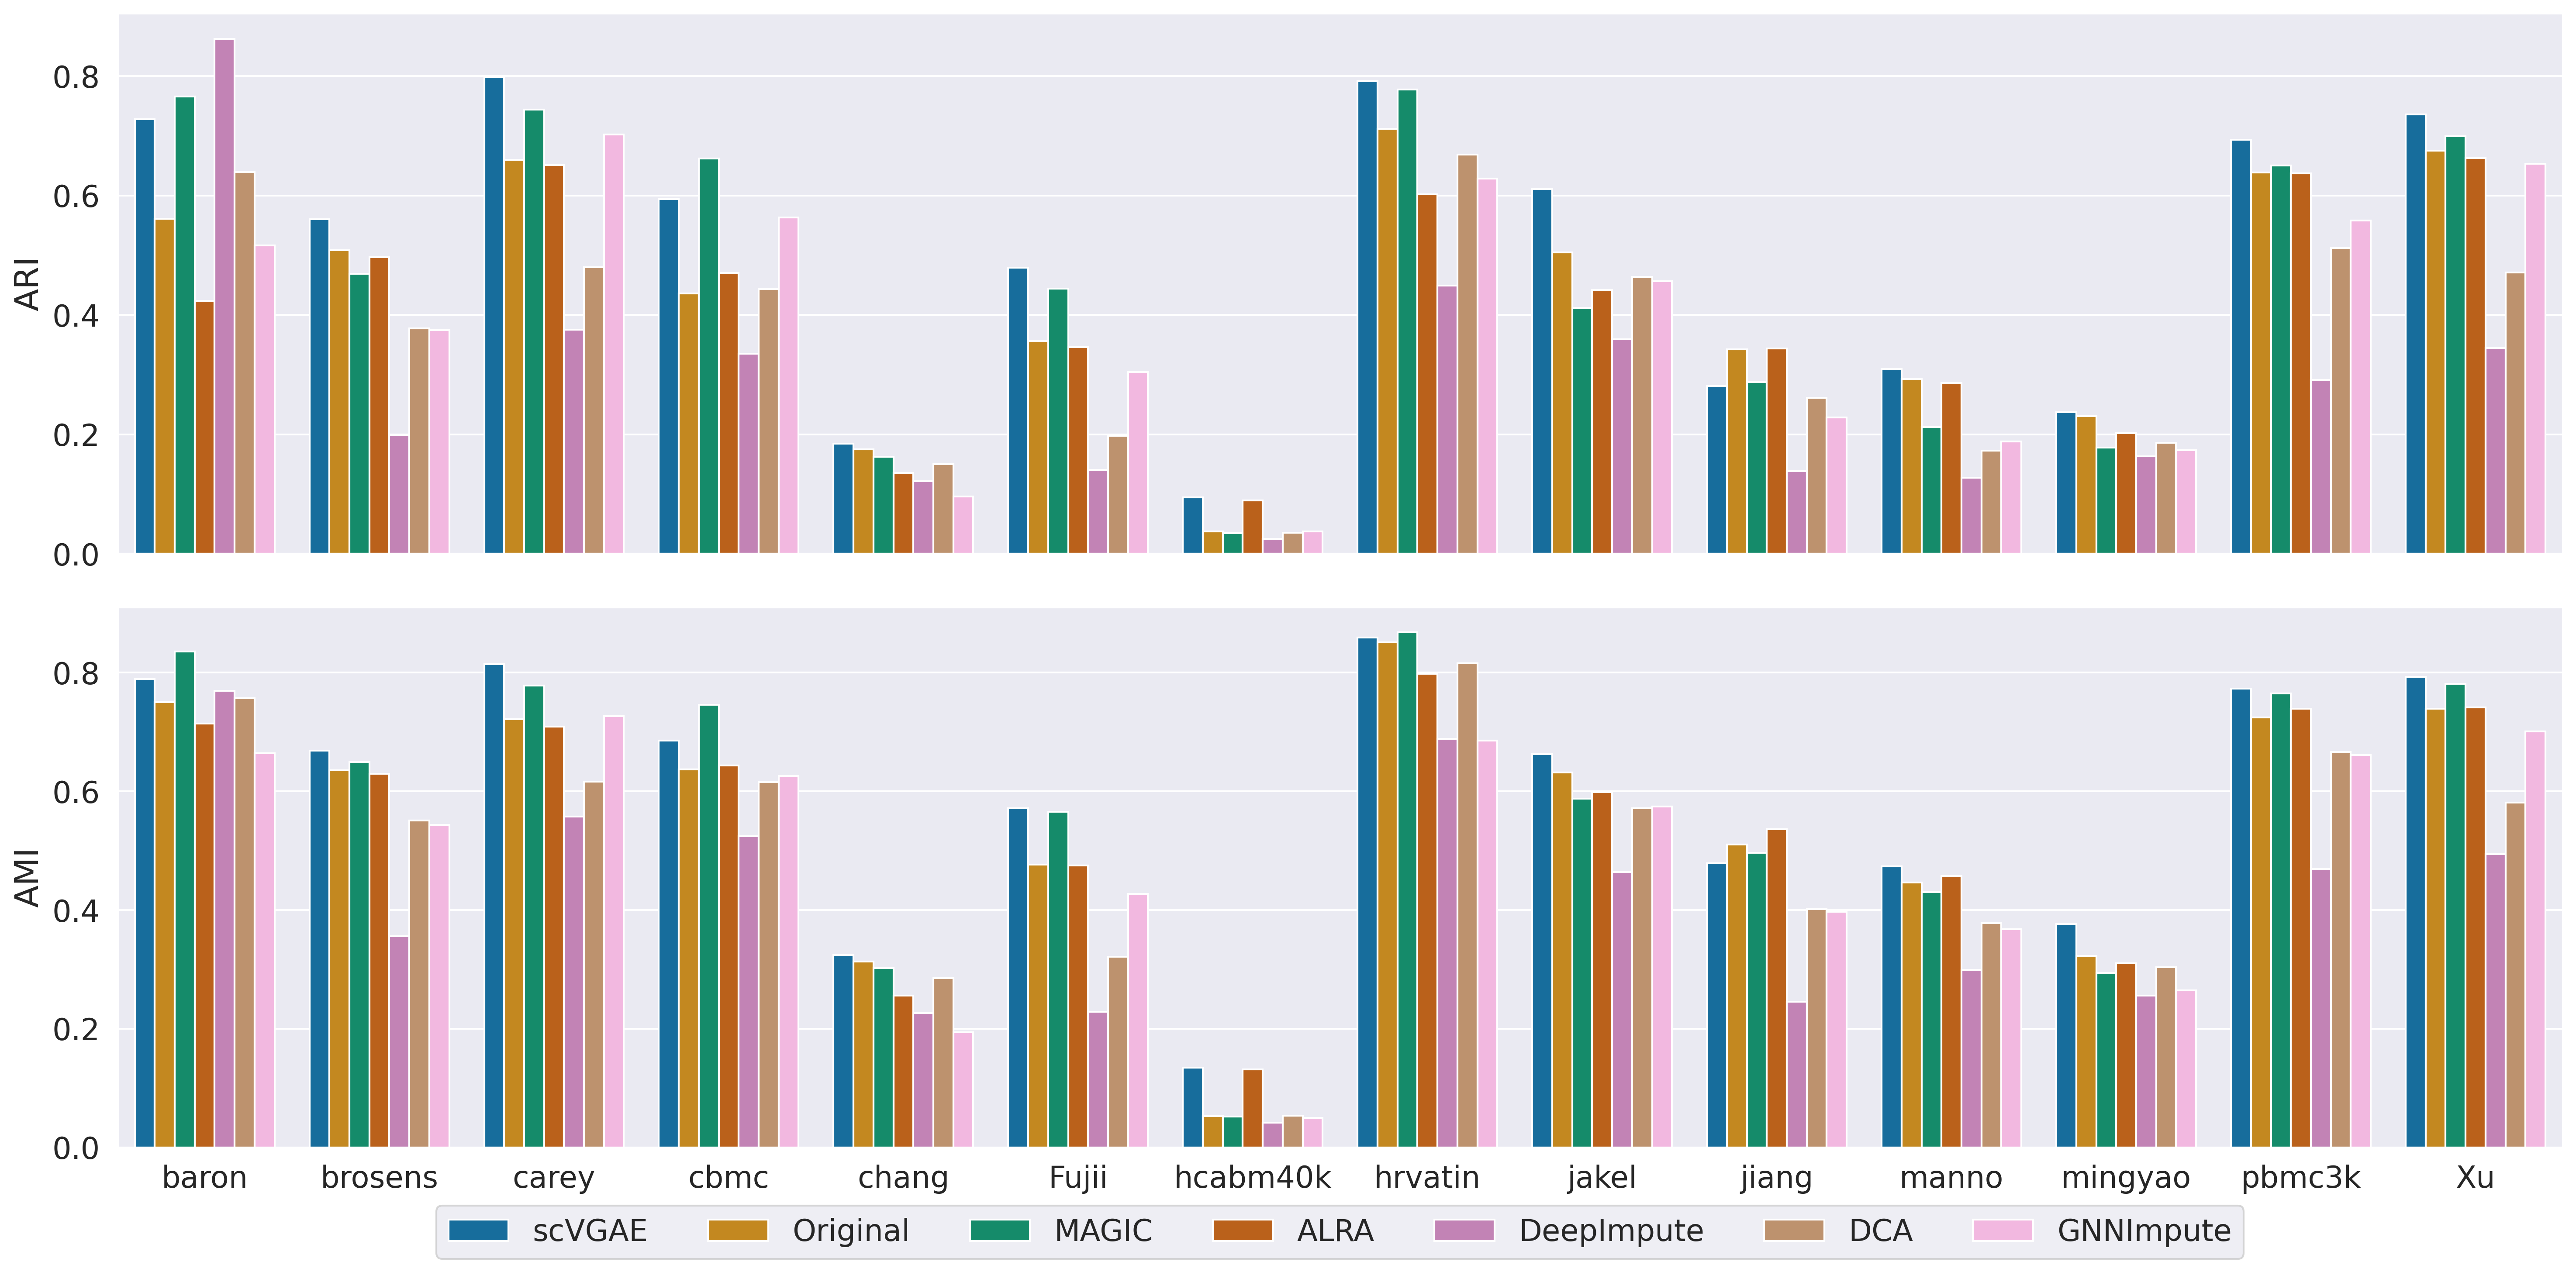

In [24]:
l = [ari, ami, 
#      nmi
    ]
cmap = sns.color_palette('colorblind')
fig = plt.figure(figsize=(20, 10), dpi=300)
grid = plt.GridSpec(len(l), 1, figure=fig)
sns.set(font_scale=1.5)
for i, j in enumerate(l):
    ax = fig.add_subplot(grid[i, 0])  # インデックスを修正
#     ax.set_facecolor('white')

    if i == 0:
        sns.barplot(data=ari[['Dataset', 'Methods', 'Value']], x='Dataset', y='Value', hue='Methods', palette=cmap, ax=ax)
        legend = ax.legend([], fancybox=False)
        legend.set_frame_on(False)
#         ax.set_yticks([])
        ax.set_xticks([])

        # ytitleとxtitleを削除
        ax.set_ylabel('ARI')
        ax.set_xlabel('')
    elif i == 1:
        sns.barplot(data=ami[['Dataset', 'Methods', 'Value']], x='Dataset', y='Value', hue='Methods', palette=cmap, ax=ax)
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08),
                  fancybox=True, 
                  shadow=False, 
                  ncol=9,
#                   fontsize=15
                 )
#         ax.set_yticks([])
#         ax.set_xticks([])

        # ytitleとxtitleを削除
        ax.set_ylabel('AMI')
        ax.set_xlabel('')

    
    else:
        sns.barplot(data=nmi[['Dataset', 'Methods', 'Value']], x='Dataset', y='Value', hue='Methods', palette=cmap, ax=ax)
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08),
                  fancybox=True, 
                  shadow=False, 
                  ncol=9,
#                   fontsize=15
                 )
    #         ax.set_yticks([])
#         ax.set_xticks([])

        # ytitleとxtitleを削除
        ax.set_ylabel('NMI')
        ax.set_xlabel('')    

# ループの外で一度だけ fig.tight_layout() を呼び出す
fig.tight_layout()

# ループの外で一度だけ plt.show() を呼び出す
plt.show()